In [ ]:
# 데이터를 플롯합니다
import matplotlib.pyplot as plt

# 큰 숫자 행렬(이미지)을 처리하기 위해
import numpy as np 

# 딥 러닝 및 AI 모델을 학습시키고 처리하기 위해 PyTorch 라이브러리
import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F 

# PyTorch 의 일부인 torchvision 입니다. 자르기와 크기 조정 같은 조작을 수행하고 이미지를 처리하는 데 이 라이브러리를 사용
import torchvision
from torchvision import datasets, transforms, models

# 이미지를 시각화할 수 있도록 PIL (Python Imaging Library)을 가져오는 코드
from PIL import Image

In [ ]:
# 플롯을 고해상도 인라인으로 표시하기 위해 다음 두 라이브러리를 가져오는 코드를 추가
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
#################### coding ########################################################################
# Tells the machine what folder contains the image data.
data_dir = './data'

# Function to read the data; crop and resize the images; and then split it into test and train chunks.
def load_split_train_test(datadir, valid_size = .2):
    # This line of code transforms the images.
    train_transforms = transforms.Compose([
                                       transforms.RandomResizedCrop(224),
                                       transforms.Resize(224),
                                       transforms.ToTensor(),
                                       ])

    test_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                          transforms.Resize(224),
                                          transforms.ToTensor(),
                                      ])

    train_data = datasets.ImageFolder(datadir, transform=train_transforms)
    test_data = datasets.ImageFolder(datadir, transform=test_transforms)

    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
    testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)
    return trainloader, testloader

# We're using 20% of data for testing.
trainloader, testloader = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)

In [ ]:
# Transform the new image into numbers and resize it.
test_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.Resize(224),
                                      transforms.ToTensor(),
                                    ])

# A function to randomly select a set of images.
def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

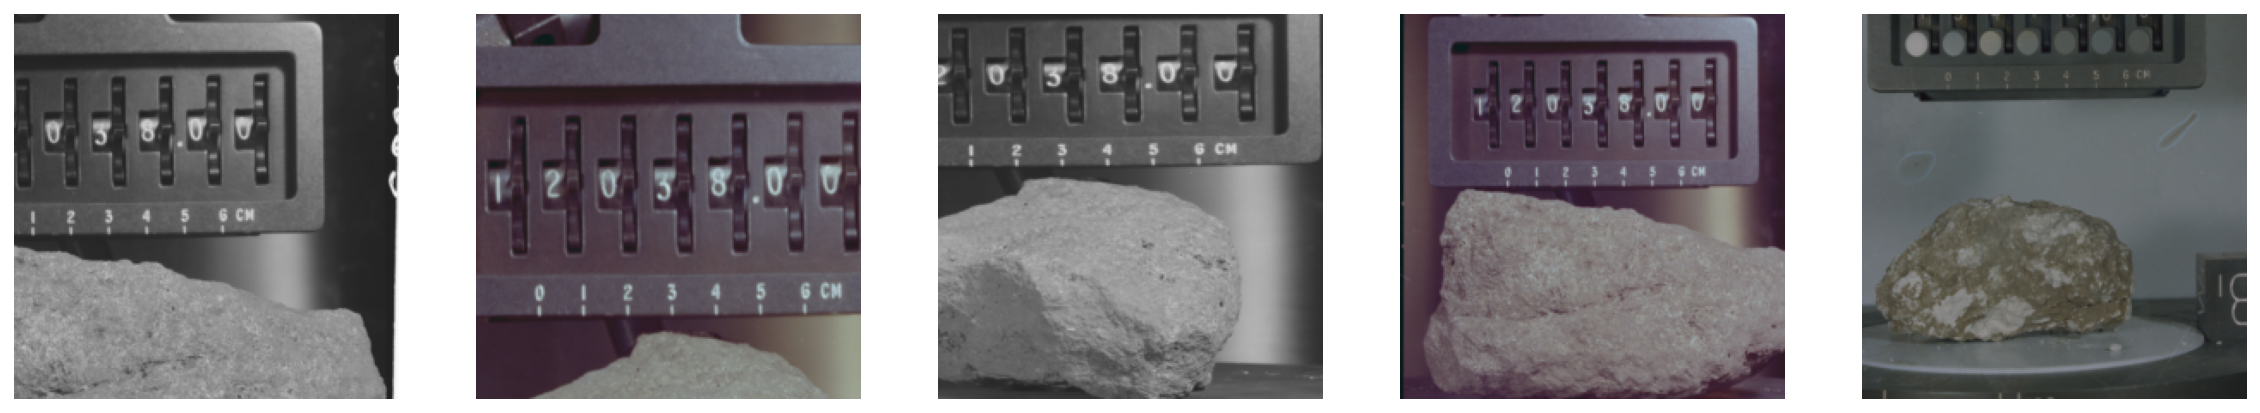

In [8]:
# How many images do you want to see? It's set to 5, but you can change the number.
images, labels = get_random_images(5)
to_pil = transforms.ToPILImage()
fig=plt.figure(figsize=(20,20))
classes=trainloader.dataset.classes
for ii in range(len(images)):
    image = to_pil(images[ii])
    sub = fig.add_subplot(1, len(images), ii+1)
    plt.axis('off')
    plt.imshow(image)
plt.show()